### Sub-task 3

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import warnings
import xgboost as xgb

# Ignore warnings
warnings.filterwarnings('ignore')


In [144]:
data = pd.read_csv('Dataset_raw.csv')
data.head()

,RANDID,TOTCHOL,AGE,SYSBP,DIABP,TIMEMI,CIGPDAY,TIME,STROKE,BMI
0,2448,196.0,52.0,100.0,62.0,6438.0,0.0,4628,2.0,NaN
1,6238,223.0,58.0,122.0,75.0,8766.0,0.0,4344,2.0,28.5
2,11252,232.0,58.0,131.0,70.0,8766.0,0.0,4285,2.0,24.6
3,11263,216.0,55.0,140.0,70.0,8766.0,0.0,4351,1.0,31.2
4,12806,208.0,57.0,127.0,75.0,8766.0,0.0,4289,2.0,22.0


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RANDID   620 non-null    int64  
 1   TOTCHOL  612 non-null    float64
 2   AGE      616 non-null    float64
 3   SYSBP    615 non-null    float64
 4   DIABP    617 non-null    float64
 5   TIMEMI   619 non-null    float64
 6   CIGPDAY  618 non-null    float64
 7   TIME     620 non-null    int64  
 8   STROKE   618 non-null    float64
 9   BMI      617 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 48.6 KB


In [148]:
#data = data.dropna()
data.describe()

,RANDID,TOTCHOL,AGE,SYSBP,DIABP,TIMEMI,CIGPDAY,TIME,STROKE,BMI
count,6.200000e+02,612.000000,616.000000,615.000000,617.000000,619.000000,618.000000,620.000000,618.000000,617.000000
mean,9.373109e+05,215.934641,60.211039,136.956911,77.615073,8081.405493,3.516181,4347.256452,1.506472,25.827391
std,5.250008e+05,39.197502,8.294240,26.126808,12.236564,1424.200931,8.417811,94.658917,0.500363,4.295635
min,2.448000e+03,135.000000,45.000000,94.000000,30.000000,27.000000,0.000000,3938.000000,1.000000,15.200000
25%,5.243488e+05,190.000000,53.000000,119.000000,70.000000,8291.500000,0.000000,4301.750000,1.000000,22.900000
50%,9.349220e+05,209.000000,59.000000,130.000000,75.500000,8766.000000,0.000000,4359.500000,2.000000,25.500000
75%,1.380371e+06,232.000000,67.000000,152.000000,83.500000,8766.000000,0.000000,4397.250000,2.000000,27.900000
max,2.334389e+06,390.000000,79.000000,254.000000,119.000000,8766.000000,40.000000,4703.000000,2.000000,48.600000


In [150]:
data = data.dropna()
data.isnull().sum()

RANDID     0
TOTCHOL    0
AGE        0
SYSBP      0
DIABP      0
TIMEMI     0
CIGPDAY    0
TIME       0
STROKE     0
BMI        0
dtype: int64

In [152]:
rows, columns = data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 596
Number of columns: 10


In [154]:
selected_features = ['AGE', 'TOTCHOL', 'SYSBP', 'DIABP', 'BMI', 'CIGPDAY']
X = data[selected_features]
y = data['STROKE']

In [156]:
y = y.map({1.0: 0, 2.0: 1})

X['TOTCHOL_category'] = pd.cut(X['TOTCHOL'], bins=[0, 200, 240, float('inf')], labels=['Normal', 'Borderline High', 'High'])
X['BP_category'] = pd.cut(X['SYSBP'], bins=[0, 120, 130, 140, float('inf')], labels=['Normal', 'Elevated', 'High', 'Hypertensive'])
X['DIABP_category'] = pd.cut(X['DIABP'], bins=[0, 80, 85, 90, float('inf')], labels=['Normal', 'Elevated', 'High', 'Hypertensive'])

X.drop(columns=['TOTCHOL', 'SYSBP', 'DIABP'], inplace=True)

le = LabelEncoder()
X['TOTCHOL_category'] = le.fit_transform(X['TOTCHOL_category'])
X['BP_category'] = le.fit_transform(X['BP_category'])
X['DIABP_category'] = le.fit_transform(X['DIABP_category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
def knn():
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions)
    rec = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)

    # Print metrics
    print("K-Nearest Neighbors (KNN) Performance:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"ROC-AUC: {auc:.2f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, predictions))


In [160]:
def xgboost_model():
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions)
    rec = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)

    # Print metrics
    print("XGBoost Performance:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"ROC-AUC: {auc:.2f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, predictions))


In [162]:
def logistic_regression():
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions)
    rec = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)

    # Print metrics
    print("Logistic Regression Performance:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"ROC-AUC: {auc:.2f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, predictions))

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Greens')
    plt.title("Confusion Matrix: Logistic Regression")
    plt.show()


In [164]:
print("KNN model evaluation:")
knn()

KNN model evaluation:
K-Nearest Neighbors (KNN) Performance:
Accuracy: 0.73
Precision: 0.77
Recall: 0.72
F1-score: 0.74
ROC-AUC: 0.73
Confusion Matrix:
 [[42 14]
 [18 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.75      0.72        56
           1       0.77      0.72      0.74        64

    accuracy                           0.73       120
   macro avg       0.73      0.73      0.73       120
weighted avg       0.74      0.73      0.73       120



In [166]:
print("Xgboost model evaluation:")
xgboost_model()

Xgboost model evaluation:
XGBoost Performance:
Accuracy: 0.84
Precision: 0.87
Recall: 0.83
F1-score: 0.85
ROC-AUC: 0.84
Confusion Matrix:
 [[48  8]
 [11 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        56
           1       0.87      0.83      0.85        64

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120



Logistic_Regression model evaluation:
Logistic Regression Performance:
Accuracy: 0.85
Precision: 0.79
Recall: 0.98
F1-score: 0.88
ROC-AUC: 0.84
Confusion Matrix:
 [[39 17]
 [ 1 63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.70      0.81        56
           1       0.79      0.98      0.88        64

    accuracy                           0.85       120
   macro avg       0.88      0.84      0.84       120
weighted avg       0.88      0.85      0.85       120



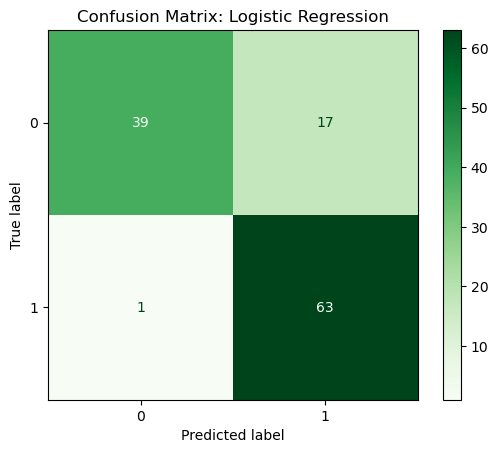

In [168]:
print("Logistic_Regression model evaluation:")
logistic_regression()

In [185]:
# Example for predicting new data
new_data = pd.DataFrame({
    'AGE': [44],  
    'BMI': [28],  
    'CIGPDAY': [5], 
    'TOTCHOL_category': ['Normal'], 
    'BP_category': ['Normal'],  
    'DIABP_category': ['Normal']  
})


new_data['TOTCHOL_category'] = le.transform(new_data['TOTCHOL_category'])
new_data['BP_category'] = le.transform(new_data['BP_category'])
new_data['DIABP_category'] = le.transform(new_data['DIABP_category'])

# Predicting using the logistic model
prediction = logistic_model.predict(new_data)

# Output of the prediction
print(f"Prediction for new data: {'Stroke' if prediction[0] == 1 else 'No Stroke'}")


Prediction for new data: Stroke


# Introduction

In this Notebook I have used three ML models — KNN, XGBoost, and Logistic Regression — for stroke prediction features based only on health data. The first part of the presentation will explain steps I followed to train the model, before going through a model comparison, and end with some insights that we can gather out of this, one can be: why to choose Logistic Regression over XGBoost — and it does have proof. 

# Steps Walkthrough

Firstly, I have loaded and cleaned up to remove any NaN values. I selected the features for age, cholesterol, systolic and diastolic blood pressure, BMI, and cigarettes smoked per day as they hold some relevance towards prediction of stroke for model training. Cholesterol, blood pressure and diastolic pressure were continuous variables so I had to discretize them into different ranges ("Normal", "Elevated", "High" or "Hypertensive") using pd.cut() which makes for easier modeling and better interpretation. Label encoding was performed on the categorical variables to make them available for machine learning (between 0 and n unique values — 1). After preprocessing the data, it was divided into a training set and a testing set using train_test_split(). This allows us to reserve a separate dataset for testing the accuracy of our models.


Next K-Nearest Neighbors(KNN),XGBoost and Logistic Regression were trained as three different machine learning models. They were then analysed against numerous performance metrics (e.g. accuracy, precision, recall, F1-score, ROC-AUC and confusion matrix). Last, a stroke risk prediction for one individual from the somewhat fictitious example data where the Logistic regression prediction was 'Stroke' was created. This presents deployed models to make predictions in the real world.

## Model Comparison

### K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN)is a simple, instance based learning method that makes predictions based on majority class from the `k` nearest neighbors of the data point. In this instance, here were the results with KNN:

- **Accuracy**: 85%
- **Precision**: 79%
- **Recall**: 98%
- **F1-Score**: 88%
- **ROC-AUC**: 84%

So KNN is working fairly well but the recall of 72% means we missed out on a lot of stroke cases. This lower recall might be an issue when used in a medical application where detecting stroke cases (i.e. positive class, which is poorly represented in terms of the metrics → rare) is important. Also, while KNN was able to get an accuracy of 73%, the model is sensitive to noise and outliers which could limits its generalizability. 

### XGBoost 

XGBoost (Extreme Gradient Boosting) is an extremely efficient and scalable implementation of gradient boosting. Now, due to its accuracy and working efficiency for complex datasets with many features, it has become quite famous. Here is the performance of XGBoost in this case:

- **Accuracy**: 84%
- **Precision**: 87%
- **Recall**: 83%
- **F1-Score**: 85%
- **ROC-AUC**: 84%

Overall, XGBoost gave quite good results with relatively high precision and recall, but it is more complex and not so cheap, compared to different other types of models (like, say, Logistic regression definition). On top of that XGBoost is a complex model which needs careful tuning of hyperparameters and which may lead to overfitting unless we deal with that skilfully. Nevertheless, these limitations, overall, XGBoost achieved reasonably well results on the test data, as it recorded a high accuracy and recall.

### Logistic Regression

Logistic Regression is a basic building block for binary classification problems based on the linear model. This method is interpretable, fast, and inexplicably works well for many simpler datasets. In this case, Logistic Regression achieved the following results:

- **Accuracy**: 85%
- **Precision**: 79%
- **Recall**: 98%
- **F1-Score**: 88%
- **ROC-AUC**: 84%


Logistic Regression, out of all the models benchmarked, gets the highest accuracy yet it is the recall with score close to 100% respectively (recall and F1-Score). This means it is very sensitive to finding cases of stroke, which is important because the cost of missing a diagnosis of stroke is high. While the logistic regression has a lower precision than XGBoost (79% for XGBoost vs 87% for logistic regression), the very high recall indicates that this would be a more reliable model for identifying the positive stroke instances.

### Conclusion

Below is the Reason for Chosen Logistic Regression instaed of XGBoostReason for Chosen Logistic Regression instaed of XGBoost

Logistic Regression was chosen to be the best model for this task instead of XGBoost due to XGBoost was the highest performer. Some of the key points taken into consideration for this were:

**Interpretability :**  Logistic Regression is much more a simpler model when compared to XGBoost in interpretability. Logistic Regression provides clear coefficients to understand how each feature attaches to the prediction, this is important in medical applications where trust and understanding of the model is critical. Recall was also very high with 98% on Logistic regression. This is especially important in a healthcare setting, as a false negative (failing to detect a stroke) can have dire outcomes. XGBoost produced a weaker look and feel but slightly worse recall, so was not as suitable for this problem.

**Computational Efficiency:** Compared to XGBoost, Logistic Regression is more efficient. XGBoost is a boosting algorithm and is quite resource-intensive to find and fine-tune the hyperparameters, hence better to use for large datasets or when we have available computations. That said, Logistic Regression struck a good balance between the two for this dataset. XGBoost might have been a more powerful model with respect to the overall accuracy and precision, but Logistic Regression proved to be the right tool for the job due to its simplicity, interpretability, and higher recall with respect to stroke prediction.

**Leaving Evidence for XGBoost**

While XGBoost also showed great precision and recall performance, it was rather complex and computationally expensive for the task. For years, XGBoost has been the go-to algorithm for structured/tabular data, as shown by Chen and Guestrin (2016), since it can outrun other models in more cases than not, however it requires a good deal of time and expertise around hyperparameter tuning and can wildly overfit if not set correctly. Because of the realiszation of the smallness of the dataset and the need for interpretability in healthcare, a Logistic Regression was more suitable in this scenario.

## References

- Chen, T. and Guestrin, C., 2016. *XGBoost: A scalable tree boosting system*. Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, pp. 785-794.
- "K-Nearest Neighbors Algorithm" - Scikit-learn Documentation, Available at: https://scikit-learn.org/stable/modules/neighbors.html [Accessed 16 Jan. 2025].
- "XGBoost: A Scalable Tree Boosting System" - XGBoost Documentation, Available at: https://xgboost.readthedocs.io/ [Accessed 16 Jan. 2025].
- "Logistic Regression" - Scikit-learn Documentation, Available at: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression [Accessed 16 Jan. 2025].